![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Problemas Clássicos da Computação


---
## Instruções Iniciais

Olá,

Para solucionar esta lista de exercícios, será necessário que assista as aulas assíncronas e consulte o material da disciplina, disponibilizados no Google Classroom.

Caso tenha dúvidas sobre a escrita de marcadores usando o Jupyter Notebook / Google Colab, consulte os links abaixo:
* https://jupyter.org/documentation
* https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook

Caso tenha dúvidas sobre programação em Python, utilização de Anaconda, Jupyter Notebook e/ou Google Colab utilize as playlists/vídeos abaixo:
* https://www.youtube.com/playlist?list=PLyqOvdQmGdTSEPnO0DKgHlkXb8x3cyglD
* https://www.youtube.com/watch?v=Gojqw9BQ5qY

A lista requer conhecimento de redes neurais, Tensorflow e Keras. Caso tenha dúvidas sobre Tensorflow e Keras, consulte os seguintes links:
* https://www.tensorflow.org/
* https://keras.io/

Caso tenha dúvidas, faça sua pergunta no fórum da disciplina no Google Classroom, envie um email para o professor (felipe.reis@ifmg.edu.br) ou faça sua pergunta durante uma aula síncrona (via Google Meet).

Após a conclusão da lista, faça do download arquivo em formato *.ipynb* e *.pdf* e submeta os arquivos na atividade do Google Classroom.

Boa prática!

---

---
### Importação de bibliotecas necessárias à prática

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

#tensorflow
import tensorflow as tf
from tensorflow.python.client import device_lib

#keras
from tensorflow import keras

#### Uso de GPU

Execute o código abaixo para verificar se está utilizando GPU para execução do Tensorflow.

In [2]:
if tf.test.gpu_device_name():
    print('Default GPU Name: {}'.format(device_lib.list_local_devices()))
else:
    print("Please install GPU version of TF")
    print('Acesse o menu Edit > Notebook Settings')
    print('Escolha a opção "Hardware Accelerator: GPU"')
    print('Importe novamente as bibliotecas e execute o código novamente')

Default GPU Name: [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 446985847143737166
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17139696221298517824
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3722444800
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15087384166174651675
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:07:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10193853644737861069
physical_device_desc: "device: XLA_GPU device"
]


#### Funções Úteis

Execute o código abaixo para utilizar funções de plotagem de imagens e recuperação do valor do array.

In [3]:
#funções úteis 
#plota imagens
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

#plota valor do array
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

---
## Questões Práticas - Parte B


### [B-01] Analise a implementação de uma rede neural MLP existente [neste](https://github.com/jaymody/backpropagation/blob/master/README.md) repositório. Descreva, com auxílio dos slides da disciplina, a rotina de back-propagation, a fase forward de treinamento e as funções de ativação (e suas derivadas) existentes no código fonte.

* Repositório: https://github.com/jaymody/backpropagation
* Autor repositório: Jay Mody
* Arquivo repositório: https://github.com/jaymody/backpropagation/blob/master/README.md


[Insira sua resposta aqui]

### [B-02] Altere a classe Perceptron abaixo e adicione um parâmetro para definir o limiar de ativação da função degrau. Apresente os dados de treinamento (verbose=True) para a operação AND, conforme tabela verdade abaixo, para os limiares de ativação iguais a 0, 0.25 e 0.5. Explique os resultados encontrados.

* **obs. 1: Limite a execução a no máximo 10 épocas de treinamento**
* **obs. 2: Utilize taxa de aprendizado máxima de 0.01**

| A  | B  | A ^ B |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |


In [4]:
class Perceptron(object):

    #inicialização da classe
    def __init__(self, no_of_inputs, epochs=100, learning_rate=0.01, 
                 activation='step', threshold=0, init='zeros'):
        
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.activation_method = 'step'
        self.threshold = threshold
        
        if(init == 'zeros'):
            self.weights = np.zeros(no_of_inputs + 1) #+1 para entrada de bias
        else:
            self.weights = np.random.rand(no_of_inputs + 1) - 0.5 #+1 para entrada de bias]
    
    #método de predição de entradas
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0] #(entrada x pesos) + bias
        
        if(self.activation_method == 'step'):
            if summation > self.threshold:
                activation = 1
            else:
                activation = 0            
            return activation, summation
        
        else:
            return None, None
    
    def predict_out(self, inputs):
        return self.predict(inputs)[0]

    #treinamento da rede neural
    def train(self, training_inputs, labels, verbose=False):
        for epoch in range(self.epochs):
            #imprime predições intermediárias
            if(verbose):
                print('Época #', epoch)
                for inputs in training_inputs:
                    activ, summ = self.predict(inputs)
                    print('Input', inputs, 'Prediction:', activ, 'Intermediary: %.3f' % summ)
            
            for inputs, label in zip(training_inputs, labels):
                prediction, _ = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs  #vetor de pesos
                self.weights[0] += self.learning_rate * (label - prediction)  #bias

In [5]:
#insira sua resposta aqui

#tabela verdade
training_inputs = np.array([
                [0, 0],
                [0, 1],
                [1, 0],
                [1, 1]], dtype='double')

#resultados esperados
labels = np.array([0, 0, 0, 1]) #and operation

In [6]:
#limiar = 0
perceptron = Perceptron(no_of_inputs=2, epochs=10, learning_rate=0.01, activation='step', threshold=0)
perceptron.train(training_inputs, labels, verbose=True)

Época # 0
Input [0. 0.] Prediction: 0 Intermediary: 0.000
Input [0. 1.] Prediction: 0 Intermediary: 0.000
Input [1. 0.] Prediction: 0 Intermediary: 0.000
Input [1. 1.] Prediction: 0 Intermediary: 0.000
Época # 1
Input [0. 0.] Prediction: 1 Intermediary: 0.010
Input [0. 1.] Prediction: 1 Intermediary: 0.020
Input [1. 0.] Prediction: 1 Intermediary: 0.020
Input [1. 1.] Prediction: 1 Intermediary: 0.030
Época # 2
Input [0. 0.] Prediction: 0 Intermediary: 0.000
Input [0. 1.] Prediction: 1 Intermediary: 0.010
Input [1. 0.] Prediction: 1 Intermediary: 0.020
Input [1. 1.] Prediction: 1 Intermediary: 0.030
Época # 3
Input [0. 0.] Prediction: 0 Intermediary: -0.010
Input [0. 1.] Prediction: 0 Intermediary: 0.000
Input [1. 0.] Prediction: 1 Intermediary: 0.010
Input [1. 1.] Prediction: 1 Intermediary: 0.020
Época # 4
Input [0. 0.] Prediction: 0 Intermediary: -0.010
Input [0. 1.] Prediction: 1 Intermediary: 0.010
Input [1. 0.] Prediction: 1 Intermediary: 0.010
Input [1. 1.] Prediction: 1 Intermed

In [7]:
#limiar = 0.25
perceptron = Perceptron(no_of_inputs=2, epochs=10, learning_rate=0.01, activation='step', threshold=0.25)
perceptron.train(training_inputs, labels, verbose=True)

Época # 0
Input [0. 0.] Prediction: 0 Intermediary: 0.000
Input [0. 1.] Prediction: 0 Intermediary: 0.000
Input [1. 0.] Prediction: 0 Intermediary: 0.000
Input [1. 1.] Prediction: 0 Intermediary: 0.000
Época # 1
Input [0. 0.] Prediction: 0 Intermediary: 0.010
Input [0. 1.] Prediction: 0 Intermediary: 0.020
Input [1. 0.] Prediction: 0 Intermediary: 0.020
Input [1. 1.] Prediction: 0 Intermediary: 0.030
Época # 2
Input [0. 0.] Prediction: 0 Intermediary: 0.020
Input [0. 1.] Prediction: 0 Intermediary: 0.040
Input [1. 0.] Prediction: 0 Intermediary: 0.040
Input [1. 1.] Prediction: 0 Intermediary: 0.060
Época # 3
Input [0. 0.] Prediction: 0 Intermediary: 0.030
Input [0. 1.] Prediction: 0 Intermediary: 0.060
Input [1. 0.] Prediction: 0 Intermediary: 0.060
Input [1. 1.] Prediction: 0 Intermediary: 0.090
Época # 4
Input [0. 0.] Prediction: 0 Intermediary: 0.040
Input [0. 1.] Prediction: 0 Intermediary: 0.080
Input [1. 0.] Prediction: 0 Intermediary: 0.080
Input [1. 1.] Prediction: 0 Intermedia

In [8]:
#limiar = 0.5
perceptron = Perceptron(no_of_inputs=2, epochs=10, learning_rate=0.01, activation='step', threshold=0.5)
perceptron.train(training_inputs, labels, verbose=True)

Época # 0
Input [0. 0.] Prediction: 0 Intermediary: 0.000
Input [0. 1.] Prediction: 0 Intermediary: 0.000
Input [1. 0.] Prediction: 0 Intermediary: 0.000
Input [1. 1.] Prediction: 0 Intermediary: 0.000
Época # 1
Input [0. 0.] Prediction: 0 Intermediary: 0.010
Input [0. 1.] Prediction: 0 Intermediary: 0.020
Input [1. 0.] Prediction: 0 Intermediary: 0.020
Input [1. 1.] Prediction: 0 Intermediary: 0.030
Época # 2
Input [0. 0.] Prediction: 0 Intermediary: 0.020
Input [0. 1.] Prediction: 0 Intermediary: 0.040
Input [1. 0.] Prediction: 0 Intermediary: 0.040
Input [1. 1.] Prediction: 0 Intermediary: 0.060
Época # 3
Input [0. 0.] Prediction: 0 Intermediary: 0.030
Input [0. 1.] Prediction: 0 Intermediary: 0.060
Input [1. 0.] Prediction: 0 Intermediary: 0.060
Input [1. 1.] Prediction: 0 Intermediary: 0.090
Época # 4
Input [0. 0.] Prediction: 0 Intermediary: 0.040
Input [0. 1.] Prediction: 0 Intermediary: 0.080
Input [1. 0.] Prediction: 0 Intermediary: 0.080
Input [1. 1.] Prediction: 0 Intermedia

* Como a taxa de aprendizado é muito pequena, o Perceptron demora mais a convergir quando o limiar é 0.25. 
* No último treinamento, devido à pequena taxa de aprendizado, o Perceptron não consegue atingir aprender a tabela verdade, sendo necessárias mais épocas para treinamento.

### [B-03] Altere a classe Perceptron da questão B-02 para inicializar os pesos com valores aleatórios entre -0.5 e 0.5 (código comentado). Apresente os dados de treinamento para a operação AND para os limiares de ativação iguais a 0, 0.25 e 0.5. Explique os resultados encontrados.

* **obs. 1: Limite a execução a no máximo 10 épocas de treinamento**
* **obs. 2: Utilize taxa de aprendizado máxima de 0.01**

In [9]:
#limiar = 0
perceptron = Perceptron(no_of_inputs=2, epochs=10, learning_rate=0.01, 
                        activation='step', threshold=0, init='random')
perceptron.train(training_inputs, labels, verbose=True)

Época # 0
Input [0. 0.] Prediction: 0 Intermediary: -0.440
Input [0. 1.] Prediction: 0 Intermediary: -0.059
Input [1. 0.] Prediction: 0 Intermediary: -0.077
Input [1. 1.] Prediction: 1 Intermediary: 0.304
Época # 1
Input [0. 0.] Prediction: 0 Intermediary: -0.440
Input [0. 1.] Prediction: 0 Intermediary: -0.059
Input [1. 0.] Prediction: 0 Intermediary: -0.077
Input [1. 1.] Prediction: 1 Intermediary: 0.304
Época # 2
Input [0. 0.] Prediction: 0 Intermediary: -0.440
Input [0. 1.] Prediction: 0 Intermediary: -0.059
Input [1. 0.] Prediction: 0 Intermediary: -0.077
Input [1. 1.] Prediction: 1 Intermediary: 0.304
Época # 3
Input [0. 0.] Prediction: 0 Intermediary: -0.440
Input [0. 1.] Prediction: 0 Intermediary: -0.059
Input [1. 0.] Prediction: 0 Intermediary: -0.077
Input [1. 1.] Prediction: 1 Intermediary: 0.304
Época # 4
Input [0. 0.] Prediction: 0 Intermediary: -0.440
Input [0. 1.] Prediction: 0 Intermediary: -0.059
Input [1. 0.] Prediction: 0 Intermediary: -0.077
Input [1. 1.] Predictio

In [10]:
#limiar = 0.25
perceptron = Perceptron(no_of_inputs=2, epochs=10, learning_rate=0.01, 
                        activation='step', threshold=0.25, init='random')
perceptron.train(training_inputs, labels, verbose=True)

Época # 0
Input [0. 0.] Prediction: 0 Intermediary: -0.257
Input [0. 1.] Prediction: 0 Intermediary: -0.458
Input [1. 0.] Prediction: 0 Intermediary: -0.586
Input [1. 1.] Prediction: 0 Intermediary: -0.787
Época # 1
Input [0. 0.] Prediction: 0 Intermediary: -0.247
Input [0. 1.] Prediction: 0 Intermediary: -0.438
Input [1. 0.] Prediction: 0 Intermediary: -0.566
Input [1. 1.] Prediction: 0 Intermediary: -0.757
Época # 2
Input [0. 0.] Prediction: 0 Intermediary: -0.237
Input [0. 1.] Prediction: 0 Intermediary: -0.418
Input [1. 0.] Prediction: 0 Intermediary: -0.546
Input [1. 1.] Prediction: 0 Intermediary: -0.727
Época # 3
Input [0. 0.] Prediction: 0 Intermediary: -0.227
Input [0. 1.] Prediction: 0 Intermediary: -0.398
Input [1. 0.] Prediction: 0 Intermediary: -0.526
Input [1. 1.] Prediction: 0 Intermediary: -0.697
Época # 4
Input [0. 0.] Prediction: 0 Intermediary: -0.217
Input [0. 1.] Prediction: 0 Intermediary: -0.378
Input [1. 0.] Prediction: 0 Intermediary: -0.506
Input [1. 1.] Predi

In [11]:
#limiar = 0.5
perceptron = Perceptron(no_of_inputs=2, epochs=10, learning_rate=0.01, 
                        activation='step', threshold=0.5, init='random')
perceptron.train(training_inputs, labels, verbose=True)

Época # 0
Input [0. 0.] Prediction: 0 Intermediary: 0.093
Input [0. 1.] Prediction: 0 Intermediary: -0.107
Input [1. 0.] Prediction: 0 Intermediary: 0.092
Input [1. 1.] Prediction: 0 Intermediary: -0.108
Época # 1
Input [0. 0.] Prediction: 0 Intermediary: 0.103
Input [0. 1.] Prediction: 0 Intermediary: -0.087
Input [1. 0.] Prediction: 0 Intermediary: 0.112
Input [1. 1.] Prediction: 0 Intermediary: -0.078
Época # 2
Input [0. 0.] Prediction: 0 Intermediary: 0.113
Input [0. 1.] Prediction: 0 Intermediary: -0.067
Input [1. 0.] Prediction: 0 Intermediary: 0.132
Input [1. 1.] Prediction: 0 Intermediary: -0.048
Época # 3
Input [0. 0.] Prediction: 0 Intermediary: 0.123
Input [0. 1.] Prediction: 0 Intermediary: -0.047
Input [1. 0.] Prediction: 0 Intermediary: 0.152
Input [1. 1.] Prediction: 0 Intermediary: -0.018
Época # 4
Input [0. 0.] Prediction: 0 Intermediary: 0.133
Input [0. 1.] Prediction: 0 Intermediary: -0.027
Input [1. 0.] Prediction: 0 Intermediary: 0.172
Input [1. 1.] Prediction: 0 I

* Como os pesos são iniciados de forma aleatória, nem sempre há convergência das redes, uma vez que a taxa de aprendizado é muito pequena;
* No entanto, como o treinamento deve ser feito de forma aleatória, essa é uma opção de inicialização melhor que a opção anterior, uma vez que o treinamento não possui um viés.

### [B-04] Implemente uma rede semelhante à existente no arquivo de referência, usando a base de dados MNIST ao invés da base de dados Fashion MNIST. A implementação deve ter os seguintes requisitos.

1. **Pré-processamento dos dados**
2. **Compilação do modelo**
3. **Treinamento da rede (otimizador=SGD)**
4. **Avaliação do modelo**

#### Informações Adicionais

O banco de dados MNIST contém dígitos manuscritos (escritos a mão).

Tem um conjunto de treinamento com 60.000 imagens e um conjunto de teste com 10.000 imagens. 

Os dígitos foram normalizados por tamanho e centralizados em uma imagem de tamanho fixo.

A base de dados foi criada por Yann LeCun em 1998.

A base MNIST está disponível em: [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/)

![MNist](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [3]:
#a base MNIST pode ser acessada facilmente pelo Keras utilizando o link abaixo
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
#pré processamento de dados
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
#modelo de rede
model = keras.Sequential([
    #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
    keras.layers.Flatten(input_shape=(28, 28)), 
    
    #Camada de dados totalmente conectadas, com ativação relu
    #A camada possui 128 nós (neurônios)
    keras.layers.Dense(128, activation='relu'),
    
    #Camada de dados totalmente conectadas, com ativação softmax
    #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
#compilação do modelo
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
#treinamento da rede
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6459 - accuracy: 0.8395
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3349 - accuracy: 0.9065
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2870 - accuracy: 0.9195
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2561 - accuracy: 0.9284
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2327 - accuracy: 0.9350
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2141 - accuracy: 0.9399
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1983 - accuracy: 0.9446
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1848 - accuracy: 0.9481
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1734 - accuracy: 0.9518
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.163

In [17]:
#avaliação do modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Acurácia de testes: %.4f' % test_acc)

313/313 - 0s - loss: 0.1605 - accuracy: 0.9534
Acurácia de testes: 0.9534


### [B-05] Plote múltiplas imagens (no mínimo 50) do conjunto de dados de teste junto às predições.

* **Dica: Se utilizar o código fonte da aula, pode ser necessário criar uma variável chamada class_names, contendo os rótulos das classes (zero, um, dois, ... nove)**

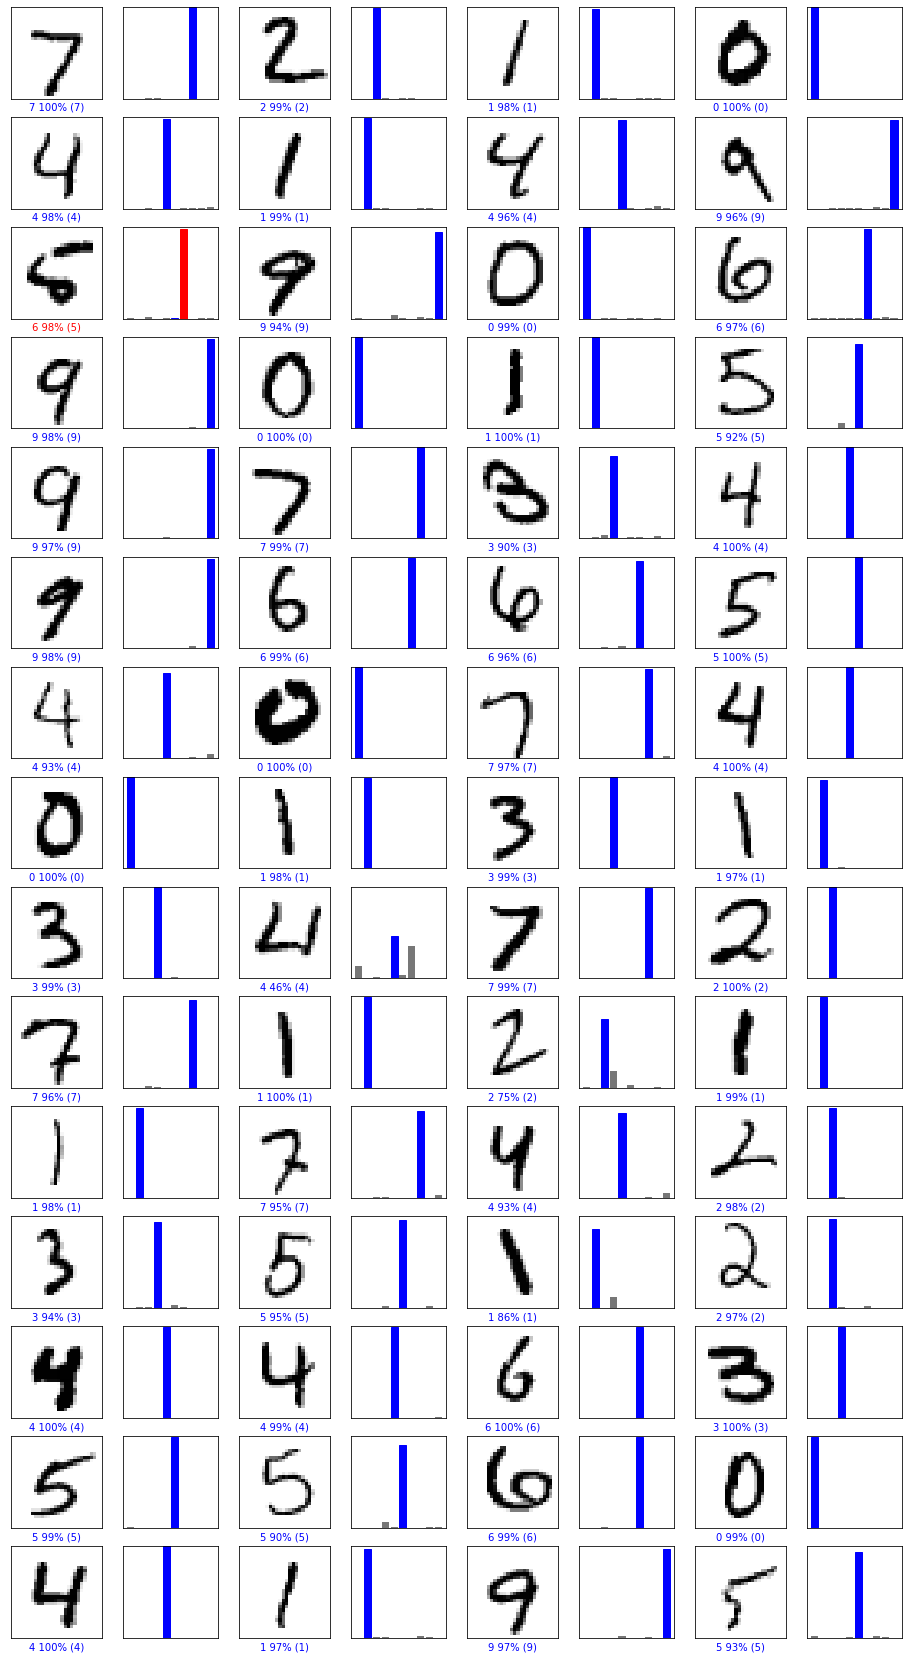

In [18]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#retorna predições de todo o conjunto de imagens de teste
predictions = model.predict(test_images)

# Plota múltiplas imagens do conjunto de teste, labels preditas e labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 15
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

### [B-06] Utilize o otimizador Adam (comando abaixo) para treinamento da rede. Compare o desempenho da rede em relação à questão B-04. 

* **obs.: As taxas de aprendizado dos métodos Adam e SGD foram definidas automaticamente e podem influenciar nos resultados.**


```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

In [19]:
#compilação do modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
#treinamento da rede
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1446 - accuracy: 0.9576
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0879 - accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0622 - accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0475 - accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0385 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0297 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0241 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0200 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0180 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.013

In [21]:
#avaliação do modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Acurácia de testes: %.4f' % test_acc)

313/313 - 0s - loss: 0.0883 - accuracy: 0.9784
Acurácia de testes: 0.9784


* Como o otimizador Adam é melhor que o otimizador SGD, o desempenho da rede neste novo teste foi consideravelmente superior ao teste anterior.

### [B-07] Utilize os seguinte comandos para parametrizar o otimizador Adam. Treine a rede com diferentes parâmetros de *learning_rate* (não altere outros parâmetros). Existe aumento da acurácia a medida que a taxa de aprendizado aumenta? Justifique.

```
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

* **obs. 1: Obtenha o maior valor possível para treinamento**

* **obs. 2: Dependendo do número de épocas de treinamento e das taxas de aprendizado, a rede pode melhorar seus resultados na base de treinamento e piorar seu desempenho na base de testes. Essa condição é conhecida como *overfitting* (sobre-treinamento).**

* **obs. 3: A base de testes não deve ser usada para refinar modelos de redes neurais!**

**Para mais informações sobre os otimizadores, consulte a documentação do Keras**

* https://keras.io/api/optimizers/
* https://keras.io/api/optimizers/adam/

In [22]:
#compilação do modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
#treinamento da rede
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5996 - accuracy: 0.8649
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5476 - accuracy: 0.8740
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5542 - accuracy: 0.8730
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5634 - accuracy: 0.8673
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5381 - accuracy: 0.8642
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5378 - accuracy: 0.8694
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5284 - accuracy: 0.8744
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5171 - accuracy: 0.8710
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5597 - accuracy: 0.8685
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.518

In [24]:
#avaliação do modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Acurácia de testes: %.4f' % test_acc)

313/313 - 0s - loss: 0.6239 - accuracy: 0.8980
Acurácia de testes: 0.8980


* O aumento da taxa de acurácia pode fazer que o otimizador passe da função de mínimo, devido ao tamanho do passo. O passo, então, deve ser adequado, para que o treinamento não demore muito e ao mesmo tempo consiga atingir o valor mínimo.

### [B-08] Treine novamente a rede com o modelo abaixo. Compare os resultados com a questão B-06. Utilize as seguintes configurações:

1. **Otimizador: Adam**
2. **Número de épocas: 10**

```
model = keras.Sequential([
    #convolução com 32 nós
    keras.layers.Conv2D(32, 3, activation='relu'),
    
    #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
    keras.layers.Flatten(input_shape=(28, 28)), 
    
    #Camada de dados totalmente conectadas, com ativação relu
    #A camada possui 128 nós (neurônios)
    keras.layers.Dense(128, activation='relu'),
    
    #Camada de dados totalmente conectadas, com ativação softmax
    #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
    keras.layers.Dense(10, activation='softmax')
])
```

In [14]:
#para a nova rede, é necessário alterar a dimensão do array de dados
#dimensão anterior: (60000,28,28)
#dimensão atual: (60000,28,28,1)
train_images = train_images[..., np.newaxis]
print(train_images.shape)

(60000, 28, 28, 1)


In [15]:
#para a nova rede, é necessário alterar a dimensão do array de dados
#dimensão anterior: (10000,28,28)
#dimensão atual: (10000,28,28,1)
test_images = test_images[..., np.newaxis]
print(test_images.shape)

(10000, 28, 28, 1)


In [7]:
#modelo da rede
model = keras.Sequential([
    #convolução com 32 nós
    keras.layers.Conv2D(32, 3, activation='relu'),
    
    #pooling de 2x2
    keras.layers.MaxPooling2D((2, 2)),
    
    #transforma a image em um array de imagens de duas dimensões (of 28 by 28 pixels)
    keras.layers.Flatten(), 
    
    #Camada de dados totalmente conectadas, com ativação relu
    #A camada possui 128 nós (neurônios)
    keras.layers.Dense(128, activation='relu'),
    
    #Camada de dados totalmente conectadas, com ativação softmax
    #A camada possui 10 nós (neurônios), correspondentes às probabilidades de cada classe (10 classes)
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
#compilação do modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
#treinamento da rede
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0056 - accuracy: 0.9984
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9989
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0016 - accuracy: 0.9995
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0023 - accuracy: 0.9991
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0020 - accuracy: 0.9993
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0014 - accuracy: 0.9995
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.001

In [16]:
#avaliação do modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Acurácia de testes: %.4f' % test_acc)

313/313 - 1s - loss: 0.0647 - accuracy: 0.9874
Acurácia de testes: 0.9874
